Predicted values: [[3]
 [5]
 [7]]
Mean squared error: 1.0


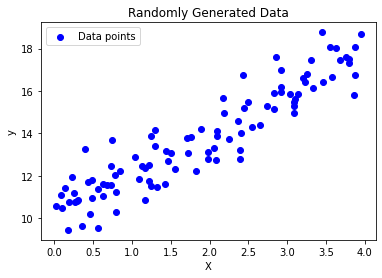

Theta values: [[10.21509616]
 [ 1.88505669]]


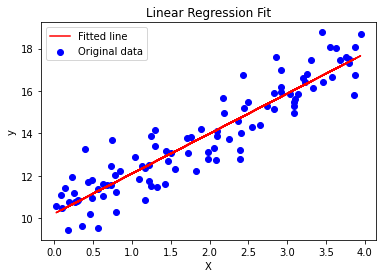

Best theta found is [1.7866477  5.51182694]
Value of f at this theta: f(theta) = 3.2838321405132094
Value of f prime at this theta: f'(theta) = [-0.42670459 -0.97634612]


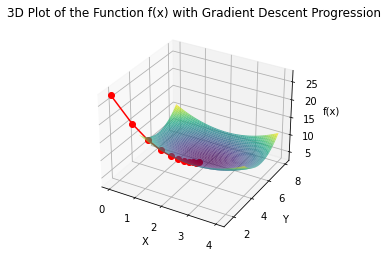

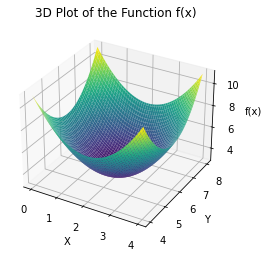

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function h(x, theta)
def h(x, theta):
    return np.dot(x, theta).reshape(-1, 1)

# Example usage
x = np.array([[1, 1], [1, 2], [1, 3]])
theta = np.array([1, 2])
y_predicted = h(x, theta)
print("Predicted values:", y_predicted)  # Output: [3 5 7]

# Function to compute mean squared error
def mean_squared_error(y_predicted, y_label):
    squared_errors = (y_predicted - y_label) ** 2
    mse = np.mean(squared_errors)
    return mse

# Example usage
y_predicted = np.array([[3], [5], [7]])
y_label = np.array([[4], [4], [8]])
mse = mean_squared_error(y_predicted, y_label)
print("Mean squared error:", mse)

# Class for Least Squares Regression
class LeastSquaresRegression:
    def __init__(self):
        self.theta = None

    def fit(self, X, y):
        if np.all(X[:, 0] != 1):
            X = np.column_stack((np.ones(X.shape[0]), X))
        X_transpose = X.T
        self.theta = np.linalg.inv(X_transpose @ X) @ X_transpose @ y

    def predict(self, X):
        if np.all(X[:, 0] != 1):
            X = np.column_stack((np.ones(X.shape[0]), X))
        return X @ self.theta

# Generate random data
np.random.seed(42)
X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

# Plot the generated data
plt.scatter(X, y, color='blue', label='Data points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Randomly Generated Data')
plt.legend()
plt.show()

# Function to add bias column
def bias_column(X):
    return np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# Initialize and fit the model
model = LeastSquaresRegression()
model.fit(X, y)
print("Theta values:", model.theta)

# Make predictions
y_pred = model.predict(X)

# Plot the original data and the predicted values
plt.scatter(X, y, color='blue', label='Original data')
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Class for Gradient Descent Optimization
class GradientDescentOptimizer:
    def __init__(self, f, fprime, start, learning_rate=0.1):
        self.f_ = f
        self.fprime_ = fprime
        self.current_ = np.array(start)
        self.learning_rate_ = learning_rate
        self.history_ = [self.current_]

    def step(self):
        new_value = self.current_ - (self.learning_rate_ * self.fprime_(self.current_))
        self.current_ = new_value
        self.history_.append(self.current_)

    def optimize(self, iterations=100):
        for i in range(iterations):
            self.step()

    def getCurrentValue(self):
        return self.current_

    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

    def plot_progression(self):
        x_range = np.linspace(0, 4, 100)
        y_range = np.linspace(4, 8, 100)
        X, Y = np.meshgrid(x_range, y_range)
        Z = np.array([self.f_(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

        history = np.array(self.history_)
        ax.plot(history[:, 0], history[:, 1], [self.f_(point) for point in history], 'r-o')

        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('f(x)')
        ax.set_title('3D Plot of the Function f(x) with Gradient Descent Progression')
        plt.show()

# Define the functions f(x) and fprime(x)
def f(x):
    a = np.array([2, 6])
    return 3 + np.dot(x - a, x - a)

def fprime(x):
    a = np.array([2, 6])
    return 2 * (x - a)

# Example usage
grad = GradientDescentOptimizer(f, fprime, np.random.normal(size=(2,)), 0.1)
grad.optimize(10)
grad.print_result()
grad.plot_progression()

# 3D Plot of the Function f(x)
x_range = np.linspace(0, 4, 100)
y_range = np.linspace(4, 8, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = np.array([f(np.array([x, y])) for x, y in zip(np.ravel(X), np.ravel(Y))]).reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x)')
ax.set_title('3D Plot of the Function f(x)')
plt.show()

def test_class_gradient_descent_optimizer(self):
    gdo = eg.GradientDescentOptimizer(TestAgent.f, TestAgent.f_prime, np.random.normal(size=(2,)), 0.1)

    gdo.optimize(10)
    user_values = gdo.getCurrentValue()

    self.assertTrue(np.all(user_values[0] > 1.5))
    self.assertTrue(np.all(user_values[0] < 1.9))
    self.assertTrue(np.all(user_values[1] > 5.0))
    self.assertTrue(np.all(user_values[1] < 5.5))
